In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
c1 = np.array([0.0, 0.0])     # Center for Class I
c2 = np.array([2.5, 2.5])     # Center for Class II
centers = np.array([c1, c2])
sigma = np.sqrt(0.5)


In [3]:
# --- Gaussian RBF Function ---
def rbf(x, center, sigma):
    return np.exp(-np.linalg.norm(x - center)**2 / (2 * sigma**2))

In [6]:
print("Enter vectors (2 values each, space-separated) and class (1 or 2). Type 'q' to finish.")
data = []
while True:
    entry = input("Vector and class (e.g., 1.0 2.0 1): ")
    if entry.lower() == 'q':
        break
    try:
        parts = entry.strip().split()
        if len(parts) != 3:
            raise ValueError
        x, y, cls = float(parts[0]), float(parts[1]), int(parts[2])
        if cls not in [1, 2]:
            raise ValueError
        data.append((np.array([x, y]), cls))
    except:
        print("Invalid input. Try again.")

Enter vectors (2 values each, space-separated) and class (1 or 2). Type 'q' to finish.
Vector and class (e.g., 1.0 2.0 1): 2 1 
Invalid input. Try again.
Vector and class (e.g., 1.0 2.0 1): 1 2 1 3 
Invalid input. Try again.
Vector and class (e.g., 1.0 2.0 1): 1 1 1
Vector and class (e.g., 1.0 2.0 1): 0 1 2
Vector and class (e.g., 1.0 2.0 1): 0 0 1
Vector and class (e.g., 1.0 2.0 1): 1 1 2
Vector and class (e.g., 1.0 2.0 1): 0 0 0
Invalid input. Try again.
Vector and class (e.g., 1.0 2.0 1): 1 0 1
Vector and class (e.g., 1.0 2.0 1): 1 0 2
Vector and class (e.g., 1.0 2.0 1): q


In [7]:
classified = []
for vec, true_class in data:
    phi1 = rbf(vec, c1, sigma)
    phi2 = rbf(vec, c2, sigma)
    predicted_class = 1 if phi1 > phi2 else 2
    classified.append((vec, true_class, predicted_class))
    print(f"Input: {vec}, True Class: {true_class}, φ1={phi1:.4f}, φ2={phi2:.4f} → Predicted: {predicted_class}")

Input: [1. 1.], True Class: 1, φ1=0.1353, φ2=0.0111 → Predicted: 1
Input: [0. 1.], True Class: 2, φ1=0.3679, φ2=0.0002 → Predicted: 1
Input: [0. 0.], True Class: 1, φ1=1.0000, φ2=0.0000 → Predicted: 1
Input: [1. 1.], True Class: 2, φ1=0.1353, φ2=0.0111 → Predicted: 1
Input: [1. 0.], True Class: 1, φ1=0.3679, φ2=0.0002 → Predicted: 1
Input: [1. 0.], True Class: 2, φ1=0.3679, φ2=0.0002 → Predicted: 1


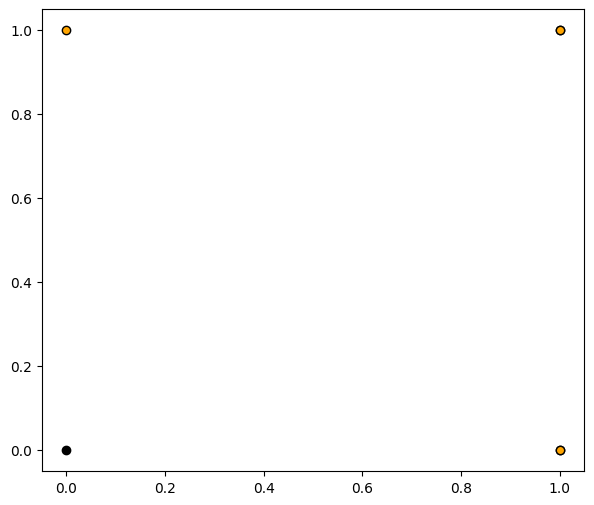

In [8]:
plt.figure(figsize=(7, 6))
for vec, true_cls, pred_cls in classified:
    if true_cls == 1:
        color = 'black' if pred_cls == true_cls else 'red'  # wrong = red
        plt.scatter(vec[0], vec[1], color=color, marker='o', label='Class I' if color == 'black' else 'Misclassified')
    else:
        color = 'lightgray' if pred_cls == true_cls else 'orange'
        plt.scatter(vec[0], vec[1], color=color, edgecolor='black', marker='o', label='Class II' if color == 'lightgray' else 'Misclassified')

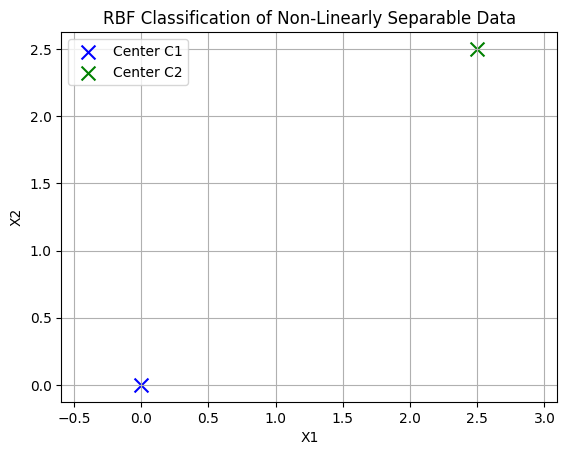

In [9]:
plt.scatter(*c1, color='blue', marker='x', s=100, label='Center C1')
plt.scatter(*c2, color='green', marker='x', s=100, label='Center C2')

plt.title("RBF Classification of Non-Linearly Separable Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.axis('equal')
# Prevent duplicate legend labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()